In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,validation_curve,learning_curve
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_squared_log_error
from yellowbrick.regressor import PredictionError
from yellowbrick.model_selection import ValidationCurve
from sklearn.datasets import load_digits
import datetime
import pickle
import pycaret


In [263]:
df = pd.read_csv('/content/Summary of Weather.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [264]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [265]:
df = df[['MaxTemp','MinTemp','MeanTemp','Date']]

In [266]:
df['Date']=pd.to_datetime(df['Date'])

In [267]:
df = df.set_index("Date")



In [268]:
df.head()

,MaxTemp,MinTemp,MeanTemp
Date,,,
1942-07-01,25.555556,22.222222,23.888889
1942-07-02,28.888889,21.666667,25.555556
1942-07-03,26.111111,22.222222,24.444444
1942-07-04,26.666667,22.222222,24.444444
1942-07-05,26.666667,21.666667,24.444444


In [269]:
df['Year']= df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['DW'] = df.index.dayofweek

df['DY'] = df.index.dayofyear
df['WY'] = df.index.weekofyear



In [270]:
df.head()

,MaxTemp,MinTemp,MeanTemp,Year,Month,Day,DW,DY,WY
Date,,,,,,,,,
1942-07-01,25.555556,22.222222,23.888889,1942,7,1,2,182,27
1942-07-02,28.888889,21.666667,25.555556,1942,7,2,3,183,27
1942-07-03,26.111111,22.222222,24.444444,1942,7,3,4,184,27
1942-07-04,26.666667,22.222222,24.444444,1942,7,4,5,185,27
1942-07-05,26.666667,21.666667,24.444444,1942,7,5,6,186,27


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119040 entries, 1942-07-01 to 1945-12-31
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   MaxTemp   119040 non-null  float64
 1   MinTemp   119040 non-null  float64
 2   MeanTemp  119040 non-null  float64
 3   Year      119040 non-null  int64  
 4   Month     119040 non-null  int64  
 5   Day       119040 non-null  int64  
 6   DW        119040 non-null  int64  
 7   DY        119040 non-null  int64  
 8   WY        119040 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 9.1 MB


In [271]:
x = df.drop('MeanTemp',axis=1)
y = df['MeanTemp']

In [272]:
y

Date
1942-07-01    23.888889
1942-07-02    25.555556
1942-07-03    24.444444
1942-07-04    24.444444
1942-07-05    24.444444
                ...    
1945-12-27    23.333333
1945-12-28    23.888889
1945-12-29    23.333333
1945-12-30    23.333333
1945-12-31    23.333333
Name: MeanTemp, Length: 119040, dtype: float64

In [273]:
X_train,X_test,Y_train,Y_test = train_test_split(x, y, test_size=0.2)

In [274]:
RF = RandomForestRegressor()

In [275]:
RF.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [276]:
pred = RF.predict(X_test)

In [289]:
print(mean_absolute_error(Y_test,pred), mean_squared_error(Y_test,pred), r2_score(Y_test,pred))

0.058806394029967915 0.04852704129890173 0.9992814010945558


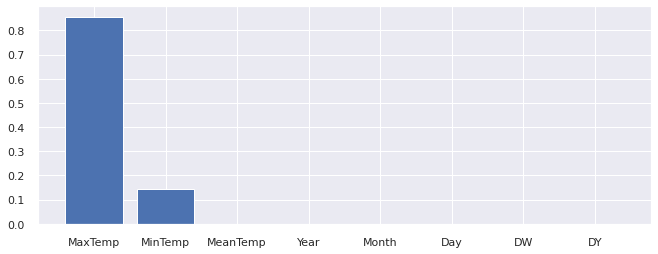

In [278]:
plt.bar( range(len(RF.feature_importances_)), RF.feature_importances_)
plt.xticks(range(len(RF.feature_importances_)), df.columns)
plt.show()

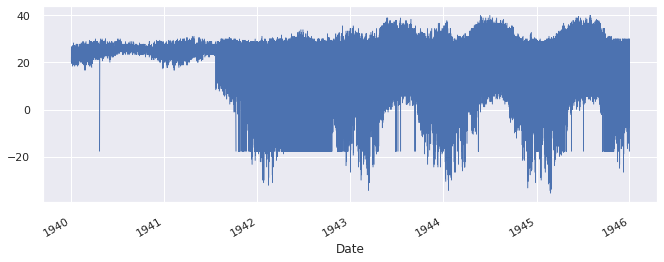

In [279]:
sns.set(rc={'figure.figsize':(11, 4)})
df['MeanTemp'].plot(linewidth=0.5);

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  contained subobjects that are estimators.
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  contained subobjects that are estimators.


ValidationCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fe58c765518>,
                cv=3, groups=None, logx=False, model=None, n_jobs=1,
                param_name='max_depth',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                pre_dispatch='all', scoring='r2')

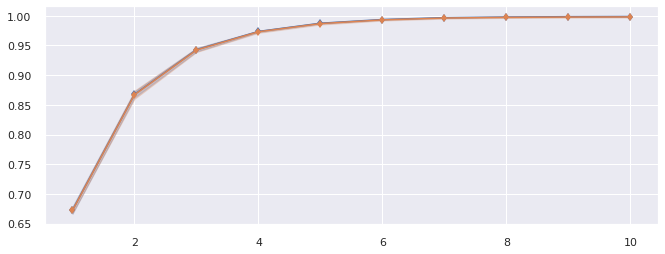

In [281]:
val = ValidationCurve(
    RandomForestRegressor(), param_name="max_depth",
    param_range=np.arange(1, 11), cv=3, scoring="r2"
)

val.fit(X_train, Y_train)



0.9992936908319983

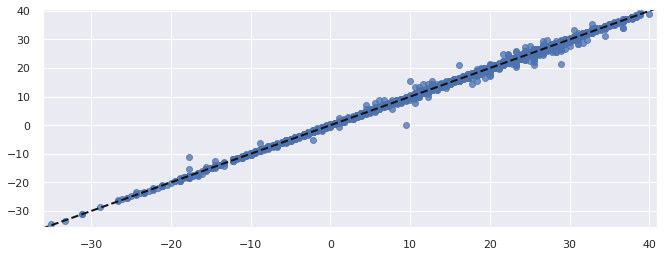

In [283]:
model = RandomForestRegressor()
visualizer = PredictionError(model)

visualizer.fit(X_train, Y_train)  
visualizer.score(X_test, Y_test)  
                 

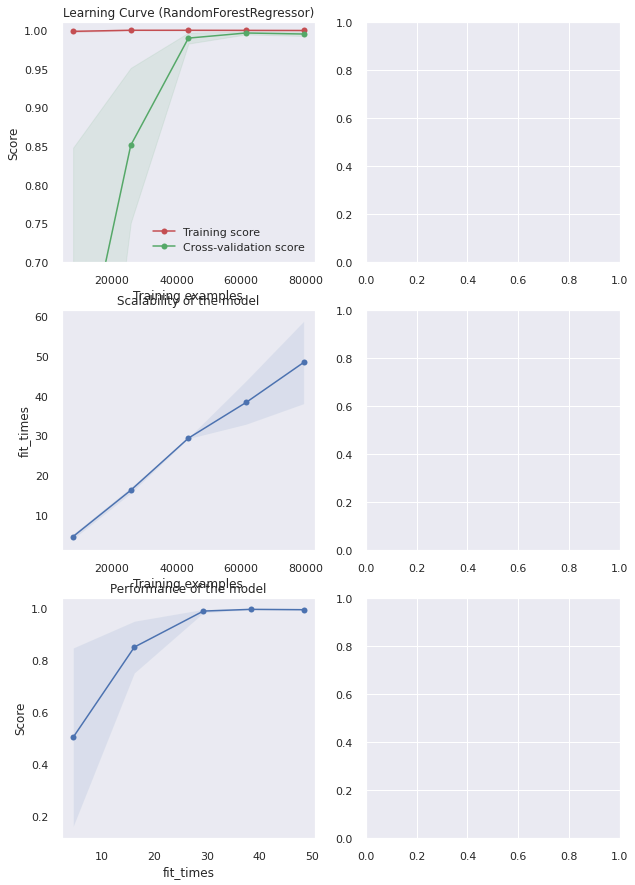

In [285]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

#X, Y = load_digits(return_X_y=True)

estimator = RandomForestRegressor()
plot_learning_curve(estimator, "Learning Curve (RandomForestRegressor)", x, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=3, n_jobs=4)



plt.show()

In [290]:
pickle.dump(RF,open('Weather in World War2_model.sav','wb'))

In [ ]:
df.to_csv('Weather in World War2.csv')

In [293]:
X_test.head()

,MaxTemp,MinTemp,Year,Month,Day,DW,DY,WY
Date,,,,,,,,
1944-03-26,25.555556,11.666667,1944,3,26,6,86,12
1942-09-12,11.666667,7.777778,1942,9,12,5,255,37
1944-10-24,35.000000,18.888889,1944,10,24,1,298,43
1943-05-31,25.000000,22.222222,1943,5,31,0,151,22
1944-05-03,36.111111,22.777778,1944,5,3,2,124,18


In [295]:
RF.predict([[22.00,28.65,77,6,25,1,1,1]])

array([24.32777778])